# <font style="color:rgb(50,120,229)"> EE5/7382 – Fundamentals of Computer Vision - Midterm
</font>

##### **<font color="red">Faking Miniatures  (25 points)</font>**
Please read the instructions supplied with the midterm for guidance, and deliverables.  

##### <font color="yellow">Preamble</font>

In [1]:
# Preamble
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

#### <font color="yellow">Step1-: Read the images using `imread()`</font>

In [2]:
fileName = ('Syros_Ermoupolis.jpg')
dirPath = '.\\Data_Midterm\\'

# Read in Grayscale mode
imRGB = cv.imread( dirPath + fileName )
im = cv.imread( dirPath + fileName , cv.IMREAD_GRAYSCALE )

# def im2double(im):
#     info = np.iinfo(im.dtype) # Get the data type of the input image
#     return im.astype(float) / info.max # Divide all values by the largest possible value in the datatype
# # Convert to double using im2double()
# im = im2double(im)

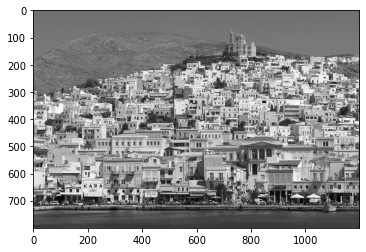

In [3]:
plt.imshow(im,'gray')

#### <font color="yellow">Step-2: Specify parameters for Diorama</font>

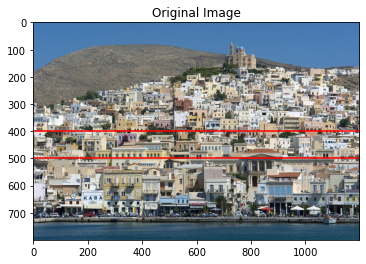

In [4]:
[nR,nC] = im.shape

startRow = 400
endRow = 500
sigma_init = 1
sigma_final = 8

# Display Original Image 
fig, ax = plt.subplots(1)
ax.imshow(cv.cvtColor(imRGB,cv.COLOR_BGR2RGB))
plt.title('Original Image'), # plt.grid()
plt.plot([0,nC-1],[startRow,startRow],color='r')
plt.plot([0,nC-1],[endRow,endRow],color='r')
plt.savefig(r'C:\Users\Hedieh\Documents\SMU\computer vision\Midterm\FakingMiniatures-borders.png')

plt.show()


#### <font color="yellow">Step-3: Define $\sigma(R)$</font>
<font color="red">WARNING:</font>You may have to typecast the blur scale $σ(R)$ to a floating point variable using the `float` method when supplying the blur scale as input to the OpenCV function `GaussianBlur`, which expects the blur scale to be `float` and not `double`

In [5]:
sigma=np.zeros(nR,dtype='float')
for nr in range(0,nR):
    if (nr>=0 and nr<startRow):
        sigma[nr]=((sigma_final-sigma_init)*abs(nr-startRow)/(startRow-1))+sigma_init
        
    if (nr>endRow and nr<=nR-1):
        sigma[nr]=((sigma_final-sigma_init)*abs(nr-endRow)/((nR-1)-endRow))+sigma_init



#### <font color="yellow">Step-4: Assemble Diorama by blur each row $R$ in ROI with appropriate $\sigma(R)$</font>

In [6]:
nR, nC, nChannels = imRGB.shape

# Create an empty image to store the Diorama effect
imRGB_Diorama = np.zeros((nR, nC, nChannels), dtype=imRGB.dtype)

for nr in range(0,nR):
    # round to integer 6*sigma 
    fltSize = int(np.round(6*(sigma[nr])))   
    # round to nearest odd integer
    fltSize = fltSize + (1-np.mod(fltSize,2))           
    
    imRGB_blurred =cv.GaussianBlur(imRGB,(fltSize,fltSize),cv.BORDER_DEFAULT)
    imRGB_Diorama[nr, :, :] = imRGB_blurred[nr, :, :]

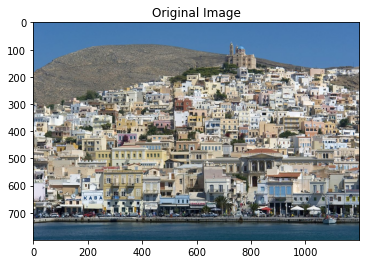

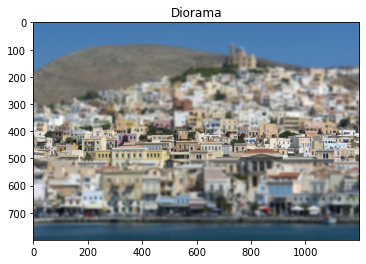

In [7]:

# Display original image
plt.figure
plt.imshow(cv.cvtColor(imRGB,cv.COLOR_BGR2RGB))
plt.title('Original Image'), # plt.grid()
plt.show()
# Display Diorama
plt.figure
plt.imshow(cv.cvtColor(imRGB_Diorama,cv.COLOR_BGR2RGB))
plt.title('Diorama'), # plt.grid()
plt.savefig(r'C:\Users\Hedieh\Documents\SMU\computer vision\Midterm\FakingMiniatures-beforecolorenhancement.png')

plt.show()


#### <font color="yellow">Step-6: Change colorspace & enhance appearance of Diorama</font>

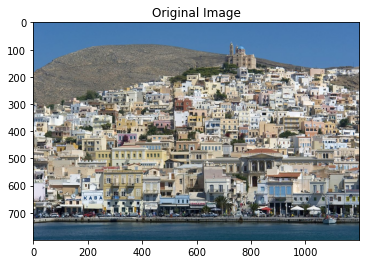

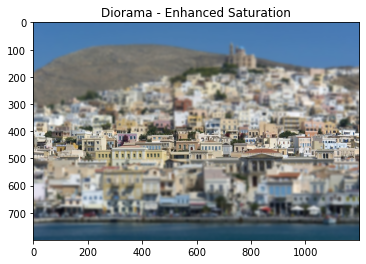

In [8]:
# Convert BGR to HSV
# https://docs.opencv.org/3.4/de/d25/imgproc_color_conversions.html
imHSV = cv.cvtColor(imRGB, cv.COLOR_BGR2HSV)

imHSV_enhanced = imHSV
# Recast to float before color space manipulation
imHSV_enhanced = imHSV_enhanced.astype(np.float32)
# Scale saturation by 1.2, clip to 255
imHSV_enhanced[:,:,1] = np.minimum(1.2*imHSV_enhanced[:,:,1],255)
# Recast to uint8 after manipulation
imHSV_enhanced = imHSV_enhanced.astype(np.uint8)

# Convert back to RGB 
imRGB_enhanced = cv.cvtColor(imHSV_enhanced, cv.COLOR_HSV2BGR)


# Display original image
plt.figure
plt.imshow(cv.cvtColor(imRGB,cv.COLOR_BGR2RGB))
plt.title('Original Image'), # plt.grid()
plt.show()

# Display Diorama - Enhanced Saturation
plt.figure
plt.imshow(cv.cvtColor(imRGB_Diorama,cv.COLOR_BGR2RGB))
plt.title('Diorama - Enhanced Saturation'), # plt.grid()
plt.savefig(r'C:\Users\Hedieh\Documents\SMU\computer vision\Midterm\FakingMiniatures-aftercolorenhancement.png')

plt.show()

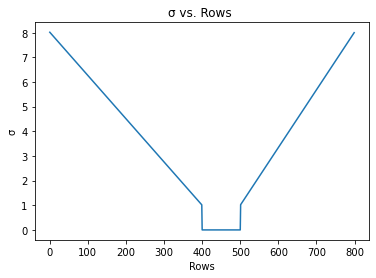

In [9]:

plt.plot(range(0,nR),sigma)
plt.title('σ vs. Rows ')
plt.xlabel('Rows' )
plt.ylabel('σ')
plt.savefig(r'C:\Users\Hedieh\Documents\SMU\computer vision\Midterm\FakingMiniatures-sigmavsrows.png')


In [10]:
sigma_init = 5
sigma_final = 20
sigma=np.zeros(nR,dtype='float')
for nr in range(0,nR):
    if (nr>=0 and nr<startRow):
        sigma[nr]=((sigma_final-sigma_init)*abs(nr-startRow)/(startRow-1))+sigma_init
        
    if (nr>endRow and nr<=nR-1):
        sigma[nr]=((sigma_final-sigma_init)*abs(nr-endRow)/((nR-1)-endRow))+sigma_init



In [11]:
nR, nC, nChannels = imRGB.shape

# Create an empty image to store the Diorama effect
imRGB_Diorama = np.zeros((nR, nC, nChannels), dtype=imRGB.dtype)

for nr in range(0,nR):
    # round to integer 6*sigma 
    fltSize = int(np.round(6*(sigma[nr])))   
    # round to nearest odd integer
    fltSize = fltSize + (1-np.mod(fltSize,2))           
    
    imRGB_blurred =cv.GaussianBlur(imRGB,(fltSize,fltSize),cv.BORDER_DEFAULT)
    imRGB_Diorama[nr, :, :] = imRGB_blurred[nr, :, :]

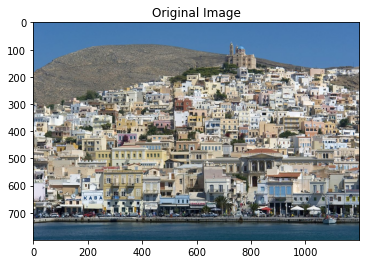

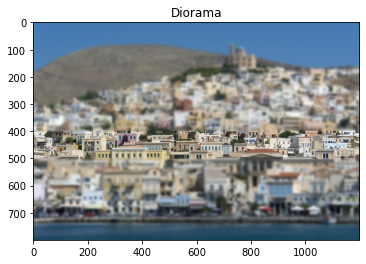

In [12]:

# Display original image
plt.figure
plt.imshow(cv.cvtColor(imRGB,cv.COLOR_BGR2RGB))
plt.title('Original Image'), # plt.grid()
plt.show()
# Display Diorama
plt.figure
plt.imshow(cv.cvtColor(imRGB_Diorama,cv.COLOR_BGR2RGB))
plt.title('Diorama'), # plt.grid()
plt.savefig(r'C:\Users\Hedieh\Documents\SMU\computer vision\Midterm\FakingMiniatures-sigma5-20-beforecolorenhancement.png')

plt.show()


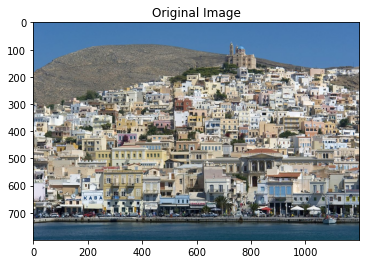

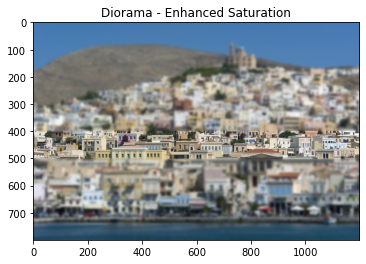

In [13]:
# Convert BGR to HSV
# https://docs.opencv.org/3.4/de/d25/imgproc_color_conversions.html
imHSV = cv.cvtColor(imRGB, cv.COLOR_BGR2HSV)

imHSV_enhanced = imHSV
# Recast to float before color space manipulation
imHSV_enhanced = imHSV_enhanced.astype(np.float32)
# Scale saturation by 1.2, clip to 255
imHSV_enhanced[:,:,1] = np.minimum(1.2*imHSV_enhanced[:,:,1],255)
# Recast to uint8 after manipulation
imHSV_enhanced = imHSV_enhanced.astype(np.uint8)

# Convert back to RGB 
imRGB_enhanced = cv.cvtColor(imHSV_enhanced, cv.COLOR_HSV2BGR)


# Display original image
plt.figure
plt.imshow(cv.cvtColor(imRGB,cv.COLOR_BGR2RGB))
plt.title('Original Image'), # plt.grid()
plt.show()

# Display Diorama - Enhanced Saturation
plt.figure
plt.imshow(cv.cvtColor(imRGB_Diorama,cv.COLOR_BGR2RGB))
plt.title('Diorama - Enhanced Saturation'), # plt.grid()
plt.savefig(r'C:\Users\Hedieh\Documents\SMU\computer vision\Midterm\FakingMiniatures-sigma5-20-aftercolorenhancement.png')

plt.show()

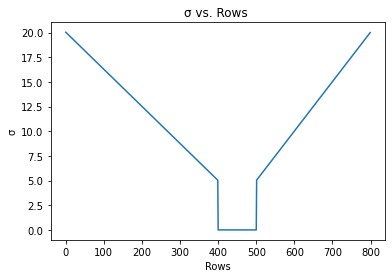

In [14]:

plt.plot(range(0,nR),sigma)
plt.title('σ vs. Rows ')
plt.xlabel('Rows' )
plt.ylabel('σ')
plt.savefig(r'C:\Users\Hedieh\Documents\SMU\computer vision\Midterm\FakingMiniatures-sigma5-20-sigmavsrows.png')


In [15]:
sigma_init = 5
sigma_final = 20
sigma=np.zeros(nR,dtype='float')
for nr in range(0,nR):
    if (nr>=0 and nr<startRow):
        sigma[nr]=(sigma_final-sigma_init)*(((nr-startRow)/(startRow-1))**2)+sigma_init
        
    if (nr>endRow and nr<=nR-1):
        sigma[nr]=((sigma_final-sigma_init)*(abs(nr-endRow)/((nR-1)-endRow)))+sigma_init



In [16]:
nR, nC, nChannels = imRGB.shape

# Create an empty image to store the Diorama effect
imRGB_Diorama = np.zeros((nR, nC, nChannels), dtype=imRGB.dtype)

for nr in range(0,nR):
    # round to integer 6*sigma 
    fltSize = int(np.round(6*(sigma[nr])))   
    # round to nearest odd integer
    fltSize = fltSize + (1-np.mod(fltSize,2))           
    
    imRGB_blurred =cv.GaussianBlur(imRGB,(fltSize,fltSize),cv.BORDER_DEFAULT)
    imRGB_Diorama[nr, :, :] = imRGB_blurred[nr, :, :]

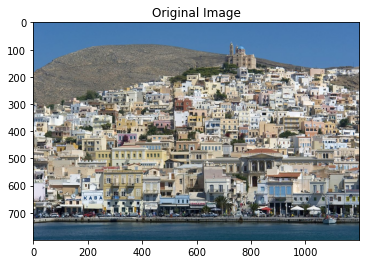

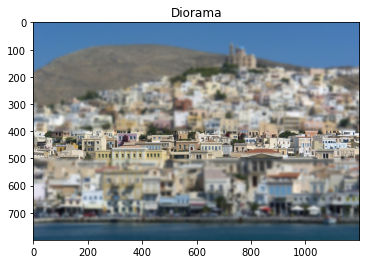

In [17]:

# Display original image
plt.figure
plt.imshow(cv.cvtColor(imRGB,cv.COLOR_BGR2RGB))
plt.title('Original Image'), # plt.grid()
plt.show()
# Display Diorama
plt.figure
plt.imshow(cv.cvtColor(imRGB_Diorama,cv.COLOR_BGR2RGB))
plt.title('Diorama'), # plt.grid()
plt.savefig(r'C:\Users\Hedieh\Documents\SMU\computer vision\Midterm\FakingMiniatures-nonlinear-sigma5-20-beforecolorenhancement.png')

plt.show()


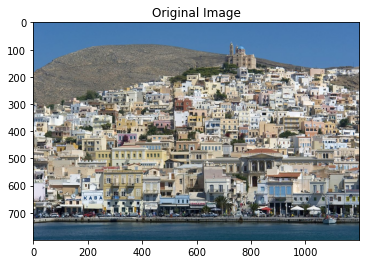

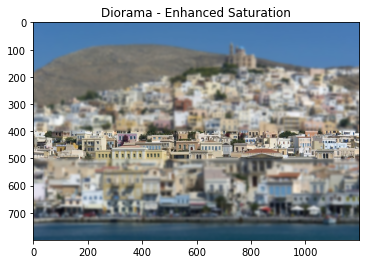

In [18]:
# Convert BGR to HSV
# https://docs.opencv.org/3.4/de/d25/imgproc_color_conversions.html
imHSV = cv.cvtColor(imRGB, cv.COLOR_BGR2HSV)

imHSV_enhanced = imHSV
# Recast to float before color space manipulation
imHSV_enhanced = imHSV_enhanced.astype(np.float32)
# Scale saturation by 1.2, clip to 255
imHSV_enhanced[:,:,1] = np.minimum(1.2*imHSV_enhanced[:,:,1],255)
# Recast to uint8 after manipulation
imHSV_enhanced = imHSV_enhanced.astype(np.uint8)

# Convert back to RGB 
imRGB_enhanced = cv.cvtColor(imHSV_enhanced, cv.COLOR_HSV2BGR)


# Display original image
plt.figure
plt.imshow(cv.cvtColor(imRGB,cv.COLOR_BGR2RGB))
plt.title('Original Image'), # plt.grid()
plt.show()

# Display Diorama - Enhanced Saturation
plt.figure
plt.imshow(cv.cvtColor(imRGB_Diorama,cv.COLOR_BGR2RGB))
plt.title('Diorama - Enhanced Saturation'), # plt.grid()
plt.savefig(r'C:\Users\Hedieh\Documents\SMU\computer vision\Midterm\FakingMiniatures-nonlinear-sigma5-20-aftercolorenhancement.png')

plt.show()

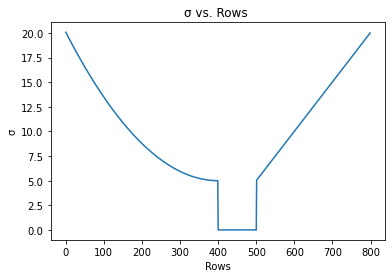

In [19]:

plt.plot(range(0,nR),sigma)
plt.title('σ vs. Rows ')
plt.xlabel('Rows' )
plt.ylabel('σ')
plt.savefig(r'C:\Users\Hedieh\Documents\SMU\computer vision\Midterm\FakingMiniatures-nonlinear-sigma5-20-sigmavsrows.png')
